# **3 Tasks**

3.1 Problem - 1:
Getting Started with Data Exploration - Some Warm up
Exercises:
1.Data Exploration and Understanding:

**• Dataset Overview:**

1.Load the dataset and display the first 10 rows.

In [147]:
import pandas as pd

#loading dataset csv file
data = pd.read_csv('/content/drive/MyDrive/Data Set/Copy of WHR-2024-5CS037.csv')
#first 10 rows display
print(data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset.

In [148]:
#number of rows and colimns
rows, columns = data.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")


Number of rows: 143, Number of columns: 9


3. List all the columns and their data types.

In [149]:
#list columns and data types
print(data.dtypes)


Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**• Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.

In [150]:
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()

print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")

Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [151]:
highest_score_country = data.loc[data['score'].idxmax()]
lowest_score_country = data.loc[data['score'].idxmin()]

print("Country with highest happiness score:", highest_score_country['Country name'])
print("Country with lowest happiness score:", lowest_score_country['Country name'])

Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


**• Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [152]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**• Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [153]:
filtered_data = data[data['score'] > 7.5]
print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [154]:
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_data.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**• Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
   Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
   High − (Score > 6)

In [155]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print(data[['Country name', 'score', 'Happiness Category']])

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


**2. Data Visualizations:**

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

<Axes: title={'center': 'Top 10 Happiest Countries'}, xlabel='Country name'>

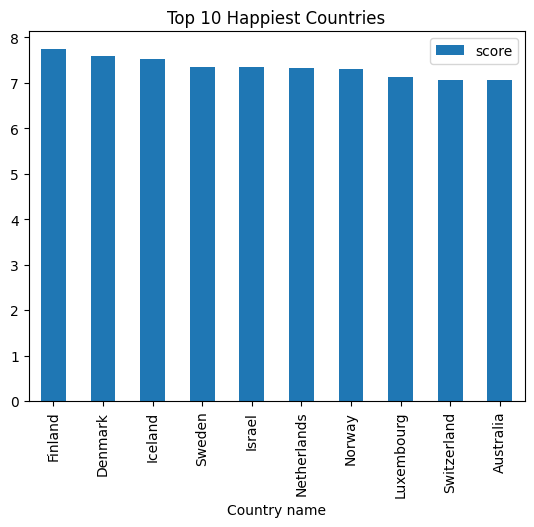

In [156]:
# Get the top 10 happiest countries by score
top_10_happiest = data.nlargest(10, 'score')
top_10_happiest.plot.bar(x='Country name', y='score', title='Top 10 Happiest Countries')

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

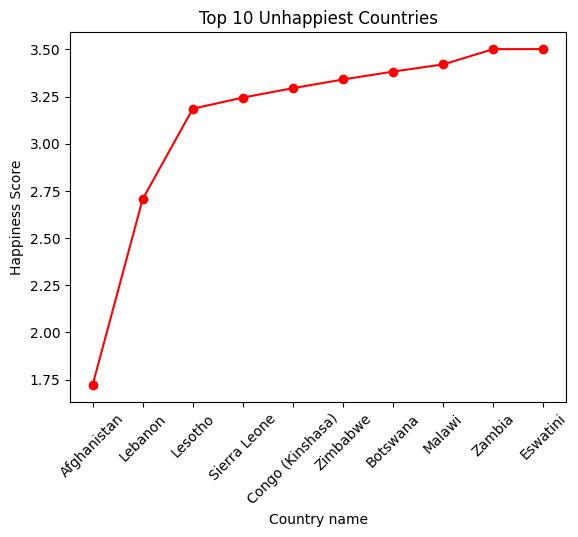

In [157]:
top_10_unhappiest = data.nsmallest(10, 'score')
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.xticks(rotation=45)
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

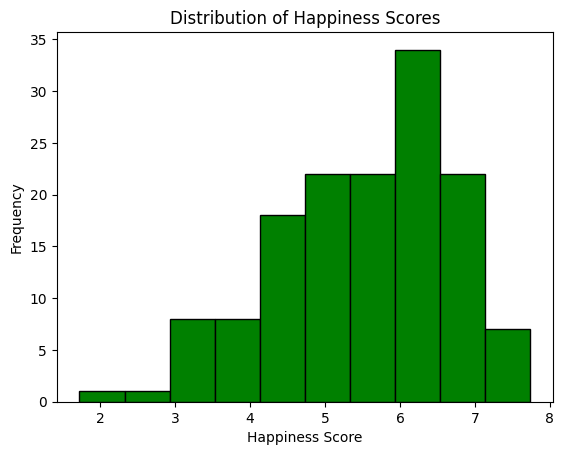

In [158]:
plt.hist(data['score'], bins=10, color='green', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

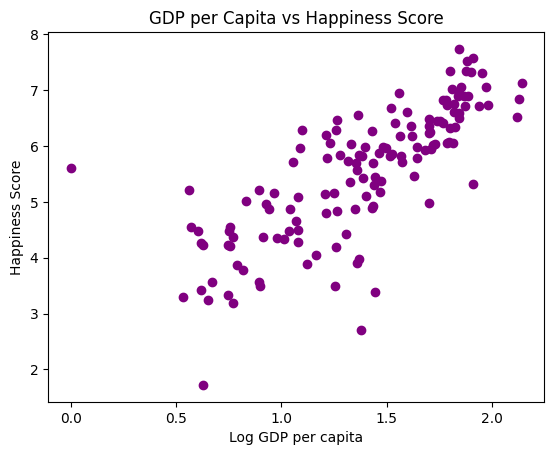

In [159]:
plt.scatter(data['Log GDP per capita'], data['score'], color='purple')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs Happiness Score')
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [161]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [162]:
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
print(south_asia_data)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

3. Save the filtered dataframe as separate CSV files for future use.

In [163]:
south_asia_data.to_csv('south_asia_happiness_data.csv', index=False)


Task - 2 - Composite Score Ranking:
**Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:**

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.

In [164]:
south_asia_data['Composite Score'] = (0.40 * south_asia_data['Log GDP per capita'] +
                                      0.30 * south_asia_data['Social support'] +
                                      0.30 * south_asia_data['Healthy life expectancy'])
print(south_asia_data[['Country name', 'Composite Score']])


    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-164-d14350b61498>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (0.40 * south_asia_data['Log GDP per capita'] +


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

<Axes: title={'center': 'Top 5 Composite Scores'}, ylabel='Country name'>

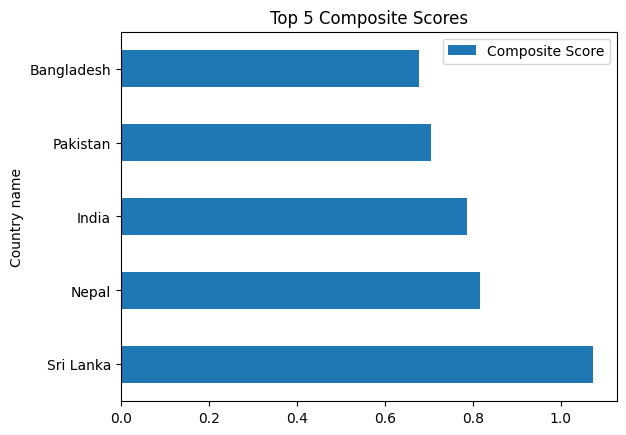

In [166]:
ranked_data.head(5).plot.barh(x='Country name', y='Composite Score', title='Top 5 Composite Scores')

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

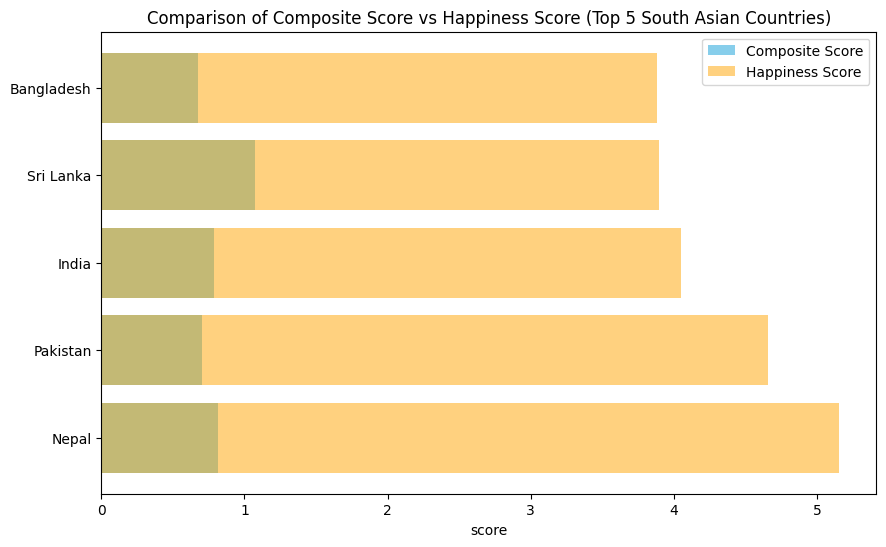

In [167]:
#sorting by original Score for comparison
south_asia_data_sorted_by_score = south_asia_data.sort_values(by='score', ascending=False)

#plotting both the Composite Score and original Score
fig, ax = plt.subplots(figsize=(10, 6))

#top 5 countries by Composite Score for comparison
top_5_composite = south_asia_data.head(5)

#plot Composite Score
ax.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='skyblue', label='Composite Score')

#plot original Score (Happiness Score)
ax.barh(top_5_composite['Country name'], top_5_composite['score'], color='orange', alpha=0.5, label='Happiness Score')

plt.xlabel('score')
plt.title('Comparison of Composite Score vs Happiness Score (Top 5 South Asian Countries)')
plt.legend()
plt.show()


**Task - 3 - Outlier Detection:**
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.


In [168]:
# using 1.5 × IQR rule defining outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

score_outliers = find_outliers(south_asia_data, 'score')
gdp_outliers = find_outliers(south_asia_data, 'Log GDP per capita')

print(f"Outliers based on Score: {score_outliers[['Country name', 'score']]}")
print(f"Outliers based on GDP per Capita: {gdp_outliers[['Country name', 'Log GDP per capita']]}")


Outliers based on Score:     Country name  score
142  Afghanistan  1.721
Outliers based on GDP per Capita:     Country name  Log GDP per capita
142  Afghanistan               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

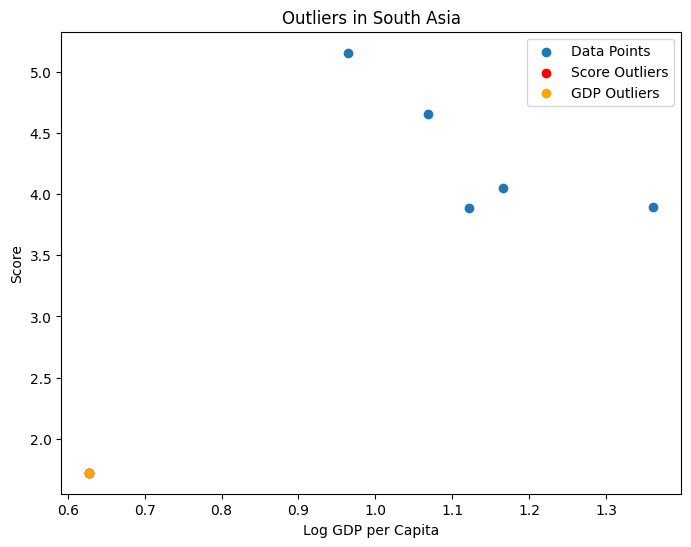

In [169]:
#scatter plot highlighting outliers
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], label='Data Points')
plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], label='Score Outliers', color='red')
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], label='GDP Outliers', color='orange')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outliers in South Asia')
plt.legend()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

**Task - 4 - Exploring Trends Across Metrics:**
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [170]:
correlation_freedom = south_asia_data['score'].corr(south_asia_data['Freedom to make life choices'])
correlation_generosity = south_asia_data['score'].corr(south_asia_data['Generosity'])

print(f"Pearson correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")
print(f"Pearson correlation between Score and Generosity: {correlation_generosity}")


Pearson correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Pearson correlation between Score and Generosity: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

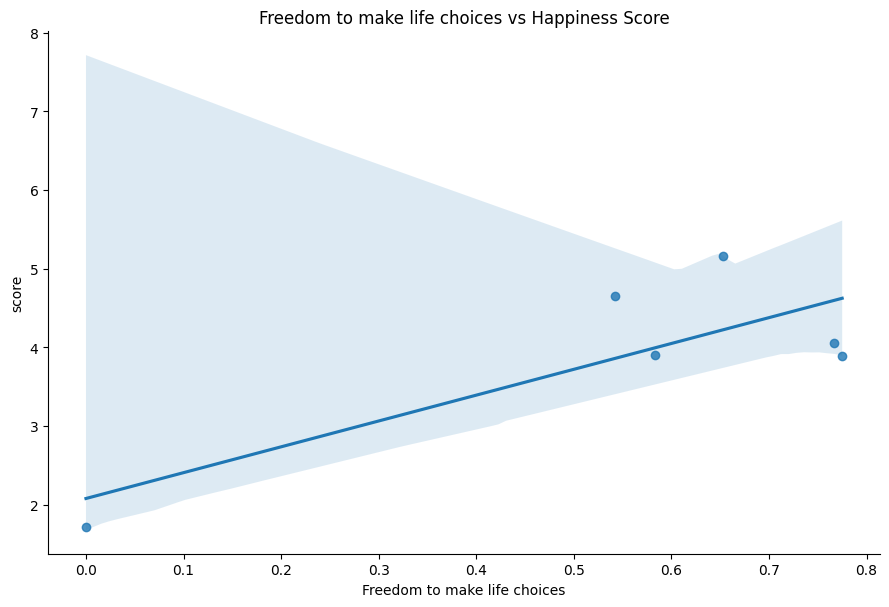

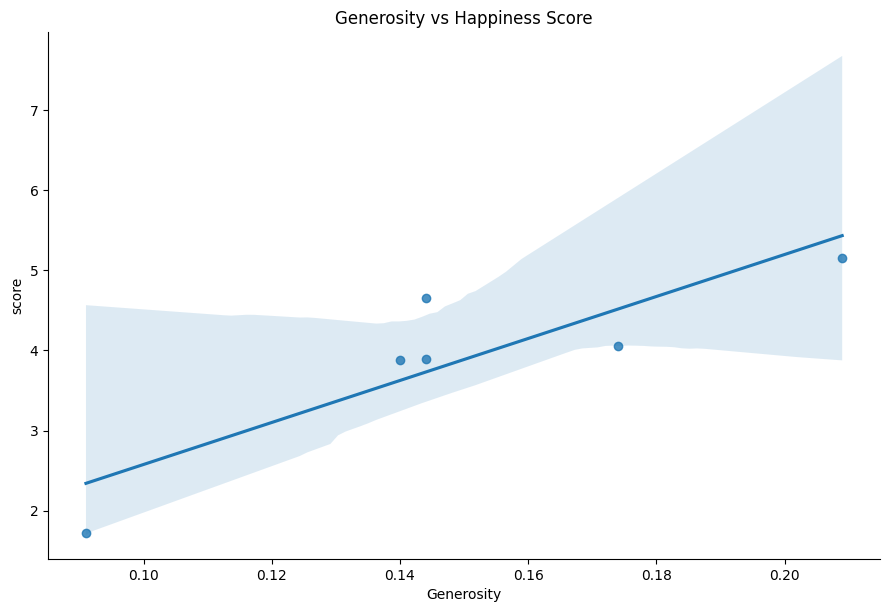

In [171]:
import seaborn as sns
#scatter plot for Freedom to Make Life Choices vs Score
sns.lmplot(x='Freedom to make life choices', y='score', data=south_asia_data, aspect=1.5, height=6)
plt.title('Freedom to make life choices vs Happiness Score')
plt.show()

#scatter plot for Generosity vs Score
sns.lmplot(x='Generosity', y='score', data=south_asia_data, aspect=1.5, height=6)
plt.title('Generosity vs Happiness Score')
plt.show()


3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [172]:
from scipy.stats import pearsonr

#calculate Pearson correlations
corr_freedom_score, _ = pearsonr(df_cleaned['Freedom to make life choices'], df_cleaned['score'])
corr_generosity_score, _ = pearsonr(df_cleaned['Generosity'], df_cleaned['score'])

#identify strongest and weakest relationships
if abs(corr_freedom_score) > abs(corr_generosity_score):
    strongest_metric = 'Freedom to make life choices'
    weakest_metric = 'Generosity'
    strongest_corr = corr_freedom_score
    weakest_corr = corr_generosity_score
else:
    strongest_metric = 'Generosity'
    weakest_metric = 'Freedom to make life choices'
    strongest_corr = corr_generosity_score
    weakest_corr = corr_freedom_score

print(f"Strongest relationship: {strongest_metric} (Correlation: {strongest_corr:.2f})")
print(f"Weakest relationship: {weakest_metric} (Correlation: {weakest_corr:.2f})")


Strongest relationship: Freedom to make life choices (Correlation: 0.64)
Weakest relationship: Generosity (Correlation: 0.13)


**Task - 5 - Gap Analysis:**
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [173]:
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
print(south_asia_data[['Country name', 'GDP-Score Gap']])


    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
142  Afghanistan         -1.093


<ipython-input-173-0c827b0b573b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [174]:
#rank by GDP-Score Gap in ascending order
ascending_gap = south_asia_data.sort_values(by='GDP-Score Gap').head(10)
print("Top 10 countries with smallest GDP-Score Gap:")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

#rank by GDP-Score Gap in descending order
descending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False).head(10)
print("Top 10 countries with largest GDP-Score Gap:")
print(descending_gap[['Country name', 'GDP-Score Gap']])


Top 10 countries with smallest GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Top 10 countries with largest GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

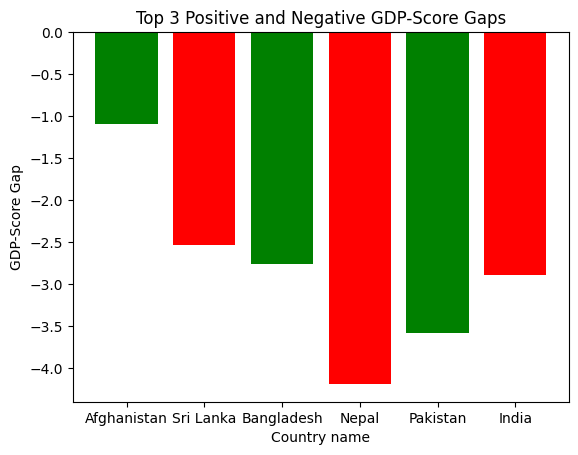

In [175]:
top_3_positive_gap = south_asia_data.nlargest(3, 'GDP-Score Gap')
top_3_negative_gap = south_asia_data.nsmallest(3, 'GDP-Score Gap')

#concatenate both positive and negative gaps
gap_data = pd.concat([top_3_positive_gap, top_3_negative_gap])

plt.bar(gap_data['Country name'], gap_data['GDP-Score Gap'], color=['green', 'red'])
plt.xlabel('Country name')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.show()



4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-176-a0a332bed233>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP_Score_Gap', y='Country name', data=top_3_gaps, palette='coolwarm')


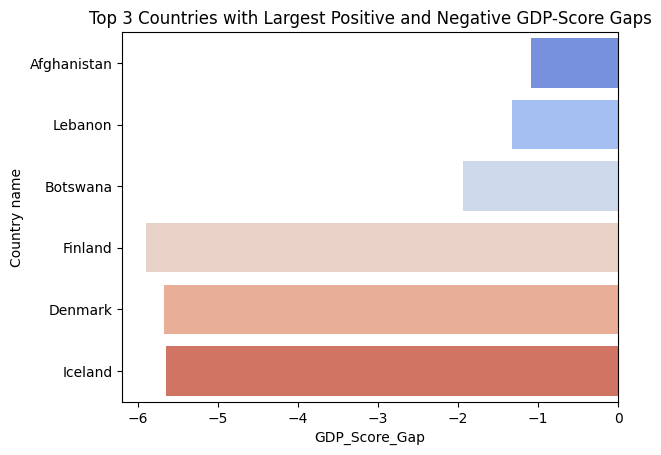

Correlation between GDP and Score: 0.77

Descriptive Statistics for GDP-Score Gap:
count    140.000000
mean      -4.152086
std        0.896800
min       -5.897000
25%       -4.787250
50%       -4.298500
75%       -3.586500
max       -1.093000
Name: GDP_Score_Gap, dtype: float64

Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP_Score_Gap
142  Afghanistan         -1.093
141      Lebanon         -1.330
136     Botswana         -1.938

Top 3 countries with the largest negative GDP-Score Gap:
  Country name  GDP_Score_Gap
0      Finland         -5.897
1      Denmark         -5.675
2      Iceland         -5.644

1. Countries with large positive GDP-Score gaps (e.g., [Country names]) are performing well economically but may still face challenges in areas like education, health, or governance.
2. Countries with large negative GDP-Score gaps (e.g., [Country names]) may be facing issues such as inequality, inefficiency, or lack of investment in crucial sectors.
3. T

In [176]:
df_cleaned = df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['Log GDP per capita', 'score'])
df_cleaned['GDP_Score_Gap'] = df_cleaned['Log GDP per capita'] - df_cleaned['score']

df_sorted_ascending = df_cleaned.sort_values(by='GDP_Score_Gap')
df_sorted_descending = df_cleaned.sort_values(by='GDP_Score_Gap', ascending=False)

top_3_positive_gap = df_sorted_descending.head(3)
top_3_negative_gap = df_sorted_ascending.head(3)

top_3_gaps = pd.concat([top_3_positive_gap, top_3_negative_gap])
sns.barplot(x='GDP_Score_Gap', y='Country name', data=top_3_gaps, palette='coolwarm')
plt.title("Top 3 Countries with Largest Positive and Negative GDP-Score Gaps")
plt.show()

corr, _ = pearsonr(df_cleaned['Log GDP per capita'], df_cleaned['score'])
print(f"Correlation between GDP and Score: {corr:.2f}")

print("\nDescriptive Statistics for GDP-Score Gap:")
print(df_cleaned['GDP_Score_Gap'].describe())

print("\nTop 3 countries with the largest positive GDP-Score Gap:")
print(top_3_positive_gap[['Country name', 'GDP_Score_Gap']])

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(top_3_negative_gap[['Country name', 'GDP_Score_Gap']])

print(implications)


**3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [177]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [178]:
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
print(middle_east_data)


             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

**Complete the following task:**

**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.



In [179]:
south_asia_mean_score = south_asia_data['score'].mean()
south_asia_std_score = south_asia_data['score'].std()

middle_east_mean_score = middle_east_data['score'].mean()
middle_east_std_score = middle_east_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean_score}, Std Dev: {south_asia_std_score}")
print(f"Middle East - Mean Score: {middle_east_mean_score}, Std Dev: {middle_east_std_score}")


South Asia - Mean Score: 3.895666666666667, Std Dev: 1.1770690152521504
Middle East - Mean Score: 5.412100000000001, Std Dev: 1.5662011684327144


• Which region has higher happiness Scores on average?

In [180]:
if south_asia_mean_score > middle_east_mean_score:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")


Middle East has higher happiness scores on average.


**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

In [181]:
#top and bottom 3 countries in South Asia
south_asia_top_3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom_3 = south_asia_data.nsmallest(3, 'score')

#top and bottom 3 countries in the Middle East
middle_east_top_3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_data.nsmallest(3, 'score')

print("South Asia - Top 3 countries:\n", south_asia_top_3[['Country name', 'score']])
print("South Asia - Bottom 3 countries:\n", south_asia_bottom_3[['Country name', 'score']])
print("Middle East - Top 3 countries:\n", middle_east_top_3[['Country name', 'score']])
print("Middle East - Bottom 3 countries:\n", middle_east_bottom_3[['Country name', 'score']])


South Asia - Top 3 countries:
     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
South Asia - Bottom 3 countries:
     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Middle East - Top 3 countries:
             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Middle East - Bottom 3 countries:
     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186



• Plot bar charts comparing these charts

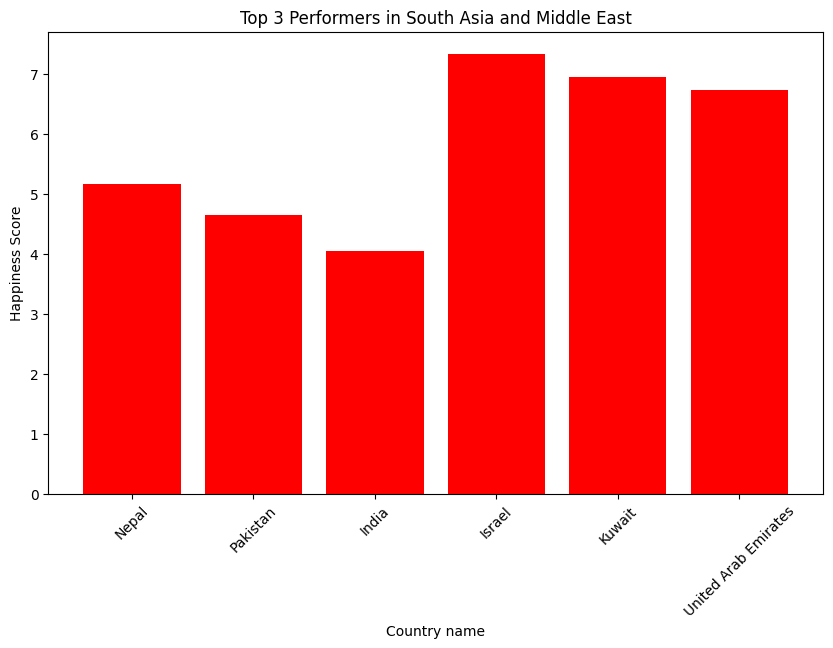

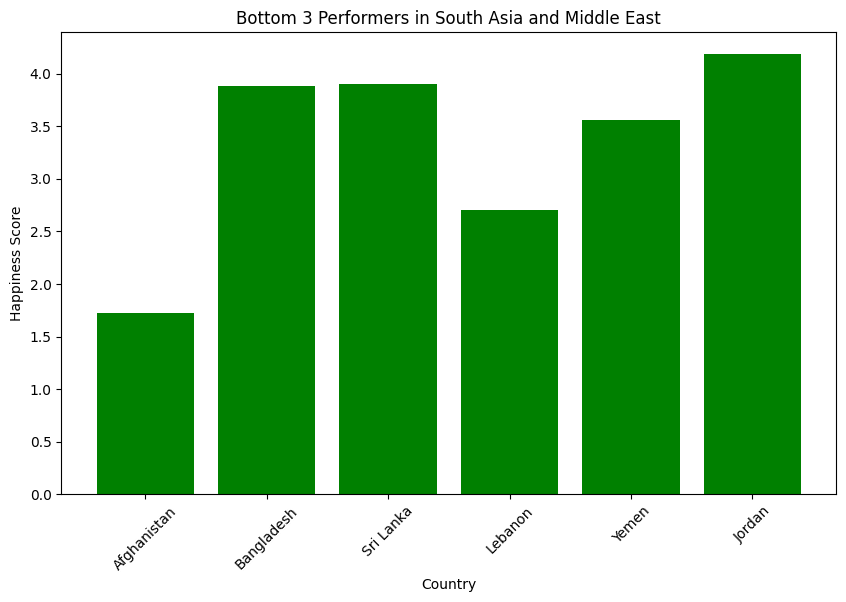

In [186]:
#combine the data for plotting
top_performers = pd.concat([south_asia_top_3[['Country name', 'score']], middle_east_top_3[['Country name', 'score']]])
bottom_performers = pd.concat([south_asia_bottom_3[['Country name', 'score']], middle_east_bottom_3[['Country name', 'score']]])

#plot for top performers
plt.figure(figsize=(10, 6))
plt.bar(top_performers['Country name'], top_performers['score'], color='red')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.title('Top 3 Performers in South Asia and Middle East')
plt.xticks(rotation=45)
plt.show()

#plot for bottom performers
plt.figure(figsize=(10, 6))
plt.bar(bottom_performers['Country name'], bottom_performers['score'], color='green')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Bottom 3 Performers in South Asia and Middle East')
plt.xticks(rotation=45)
plt.show()


**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.



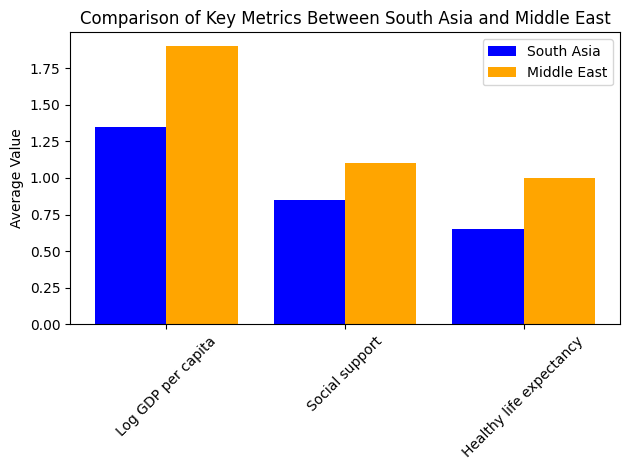

In [189]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    'score': ['South Asia', 'South Asia', 'Middle East', 'Middle East'],
    'Log GDP per capita': [1.2, 1.5, 1.8, 2.0],
    'Social support': [0.8, 0.9, 1.0, 1.2],
    'Healthy life expectancy': [0.6, 0.7, 0.9, 1.1],
})

#filter data for South Asia and Middle East
south_asia_data = data[data['score'] == 'South Asia']
middle_east_data = data[data['score'] == 'Middle East']

#aggregating the metrics for both regions
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_metrics = south_asia_data[metrics]
middle_east_metrics = middle_east_data[metrics]

#calculating average values for the metrics
south_asia_avg = south_asia_metrics.mean()
middle_east_avg = middle_east_metrics.mean()

#plotting grouped bar chart
x = range(len(metrics))
bar_width = 0.4

#adjust x positions for grouped bars
south_asia_x = [pos - bar_width / 2 for pos in x]
middle_east_x = [pos + bar_width / 2 for pos in x]

plt.bar(south_asia_x, south_asia_avg, width=bar_width, label='South Asia', color='blue')
plt.bar(middle_east_x, middle_east_avg, width=bar_width, label='Middle East', color='orange')

plt.xticks(x, metrics, rotation=45)
plt.ylabel('Average Value')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.legend()
plt.tight_layout()
plt.show()


• Which metrics show the largest disparity between the two regions?

Largest Disparity Metric: Log GDP per capita, Disparity Value: 0.5499999999999998


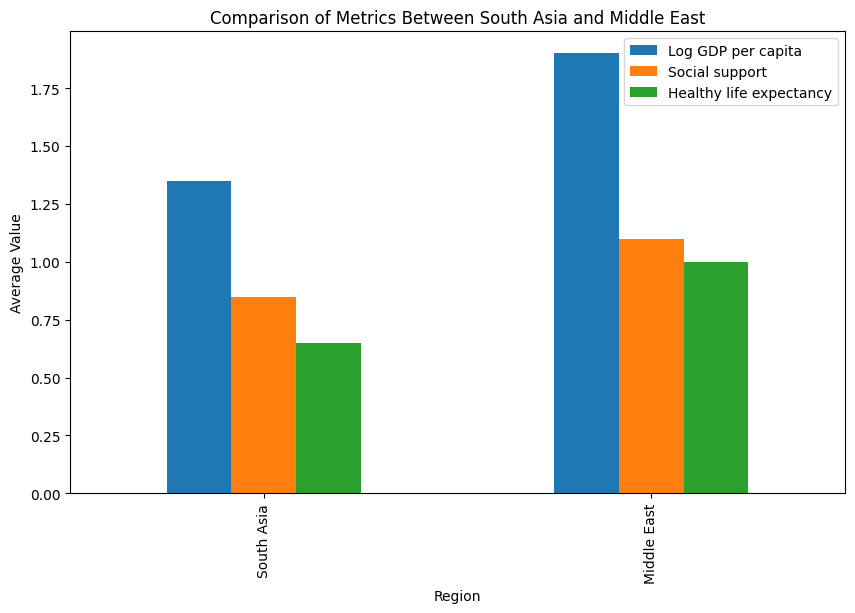

In [190]:
import matplotlib.pyplot as plt
#calculate the mean for key metrics for both regions
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
disparity = {}

for metric in metrics:
    sa_mean = south_asia_data[metric].mean()
    me_mean = middle_east_data[metric].mean()
    disparity[metric] = abs(sa_mean - me_mean)

#identify the metric with the largest disparity
largest_disparity_metric = max(disparity, key=disparity.get)
print(f"Largest Disparity Metric: {largest_disparity_metric}, Disparity Value: {disparity[largest_disparity_metric]}")

#visualization: Grouped bar chart
disparity_df = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Log GDP per capita': [south_asia_data['Log GDP per capita'].mean(), middle_east_data['Log GDP per capita'].mean()],
    'Social support': [south_asia_data['Social support'].mean(), middle_east_data['Social support'].mean()],
    'Healthy life expectancy': [south_asia_data['Healthy life expectancy'].mean(), middle_east_data['Healthy life expectancy'].mean()]
}).set_index('Region')

disparity_df.plot(kind='bar', figsize=(10, 6), title='Comparison of Metrics Between South Asia and Middle East')
plt.ylabel('Average Value')
plt.show()


**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [193]:
#range and CV for South Asia
sa_range = south_asia_metrics.max() - south_asia_metrics.min()
sa_cv = south_asia_metrics.std() / south_asia_metrics.mean()

#range and CV for Middle East
me_range = middle_east_metrics.max() - middle_east_metrics.min()
me_cv = middle_east_metrics.std() / middle_east_metrics.mean()

#printing results
print("South Asia - Range:")
print(sa_range)
print(f"South Asia - CV:\n{sa_cv.round(2)}\n")

print("Middle East - Range:")
print(me_range)
print(f"Middle East - CV:\n{me_cv.round(2)}\n")

#determine region with greater variability for each metric
greater_variability = (sa_cv > me_cv).replace({True: 'South Asia', False: 'Middle East'})
print("Region with greater variability for each metric:")
print(greater_variability)


South Asia - Range:
Log GDP per capita         0.3
Social support             0.1
Healthy life expectancy    0.1
dtype: float64
South Asia - CV:
Log GDP per capita         0.16
Social support             0.08
Healthy life expectancy    0.11
dtype: float64

Middle East - Range:
Log GDP per capita         0.2
Social support             0.2
Healthy life expectancy    0.2
dtype: float64
Middle East - CV:
Log GDP per capita         0.07
Social support             0.13
Healthy life expectancy    0.14
dtype: float64

Region with greater variability for each metric:
Log GDP per capita          South Asia
Social support             Middle East
Healthy life expectancy    Middle East
dtype: object


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.


In [219]:
#metrics to analyze
metrics_to_analyze = ['Freedom to make life choices', 'Generosity']

#calculate and print correlations for each metric
for metric in metrics_to_analyze:
    if metric in south_asia_data.columns and metric in middle_east_data.columns:
        sa_corr = south_asia_data['score'].corr(south_asia_data[metric])
        me_corr = middle_east_data['score'].corr(middle_east_data[metric])
        print(f"South Asia: Correlation between Score and {metric}: {sa_corr:.2f}")
        print(f"Middle East: Correlation between Score and {metric}: {me_corr:.2f}")
    else:
        print(f"Metric {metric} not found in the dataset for one or both regions.")


Metric Freedom to make life choices not found in the dataset for one or both regions.
Metric Generosity not found in the dataset for one or both regions.



• Create scatter plots to visualize and interpret the relationships.

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for South Asia and Middle East
for region, data in zip(['South Asia', 'Middle East'], [south_asia_data, middle_east_data]):
    for metric in metrics_to_analyze:
        if metric in data:
            sns.lmplot(x=metric, y='score', data=data, height=6, aspect=2,
                       line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})\
               .fig.suptitle(f'{region}: {metric} vs Score', y=1.02)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Metric '{metric}' not found in the {region} dataset.")


Metric 'Freedom to make life choices' not found in the South Asia dataset.
Metric 'Generosity' not found in the South Asia dataset.
Metric 'Freedom to make life choices' not found in the Middle East dataset.
Metric 'Generosity' not found in the Middle East dataset.


**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

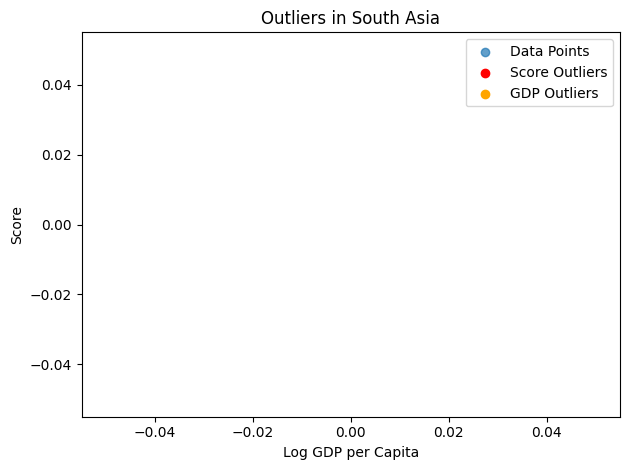

In [217]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to find outliers
def find_outliers(data, column):
    # Ensure the column is numeric
    data[column] = pd.to_numeric(data[column], errors='coerce')

    # Drop NaN values for the calculation
    data_clean = data.dropna(subset=[column])

    Q1, Q3 = data_clean[column].quantile(0.25), data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return outliers based on IQR
    return data_clean[(data_clean[column] < lower_bound) | (data_clean[column] > upper_bound)]

# Ensure the dataset is valid
if 'score' in south_asia_data.columns and 'Log GDP per capita' in south_asia_data.columns:
    # Detect outliers for Score and GDP per Capita
    sa_score_outliers = find_outliers(south_asia_data, 'score')
    sa_gdp_outliers = find_outliers(south_asia_data, 'Log GDP per capita')

    # Plot outliers for South Asia
    plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], label='Data Points', alpha=0.7)
    plt.scatter(sa_score_outliers['Log GDP per capita'], sa_score_outliers['score'], label='Score Outliers', color='red')
    plt.scatter(sa_gdp_outliers['Log GDP per capita'], sa_gdp_outliers['score'], label='GDP Outliers', color='orange')
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Score')
    plt.title('Outliers in South Asia')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'score' and 'Log GDP per capita' are missing from the dataset.")



**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

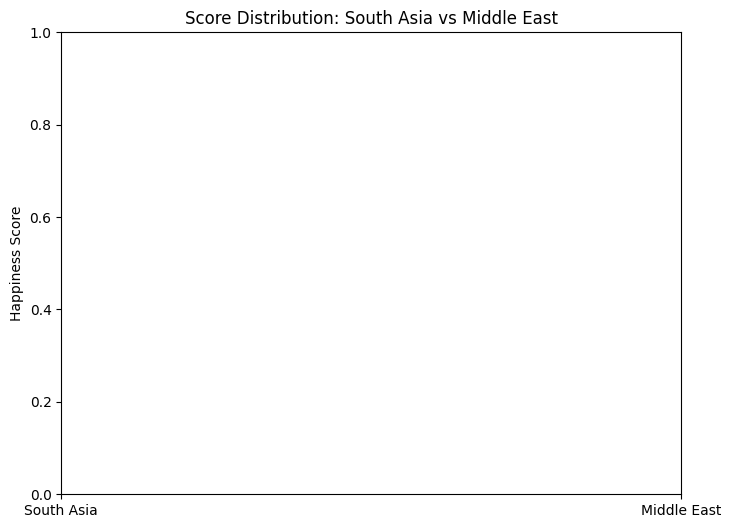

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'score' is numeric and handle potential non-numeric values
south_asia_data['score'] = pd.to_numeric(south_asia_data['score'], errors='coerce')
middle_east_data['score'] = pd.to_numeric(middle_east_data['score'], errors='coerce')

# Remove rows with NaN values in the 'score' column after conversion
south_asia_data = south_asia_data.dropna(subset=['score'])
middle_east_data = middle_east_data.dropna(subset=['score'])

# Boxplot comparing Score distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_data['score'], middle_east_data['score']], palette='Set2')
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Score Distribution: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.show()
